<a href="https://colab.research.google.com/github/pevu97/Aerial-Object-Classifier/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications import VGG19

np.set_printoptions(precision=6, suppress=True)

In [ ]:
!git clone https://github.com/mwalmsley/galaxy_mnist
!pip install -e galaxy_mnist

Cloning into 'galaxy_mnist'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 59 (delta 30), reused 42 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 3.38 MiB | 7.49 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Obtaining file:///content/galaxy_mnist
  Preparing metadata (setup.py) ... done
  Running setup.py develop for galaxyMNIST


In [ ]:
from galaxy_mnist import GalaxyMNIST

# 64 pixel images
dataset = GalaxyMNIST(
    root='/some/download/folder',
    download=True,
    train=True  # by default, or set False for test set
)

ImportError: cannot import name 'GalaxyMNIST' from 'galaxy_mnist' (unknown location)

In [ ]:
from galaxy_datasets import demo_rings

catalog, label_cols = demo_rings(
    root='/content/demo_rings',
    train=True,
    download=True
)

100%|██████████| 30797/30797 [00:00<00:00, 161902.72it/s]


100%|██████████| 10802/10802 [00:00<00:00, 21698693.39it/s]


100%|██████████| 43446358/43446358 [00:02<00:00, 16600724.61it/s]


Extracting /content/demo_rings/demo_rings_images.tar.gz to /content/demo_rings


In [ ]:
import tensorflow as tf
from galaxy_datasets.tensorflow.datasets import get_image_dataset, add_transforms_to_dataset
from galaxy_datasets.transforms import default_transforms  # same transforms as PyTorch

train_dataset = get_image_dataset(
    image_paths = catalog['file_loc'],
    labels=catalog[label_cols].values,
    requested_img_size=224
)


for images, labels in train_dataset.take(1):
    print(images.shape, labels.shape)
    break

(224, 224, 3) (1,)


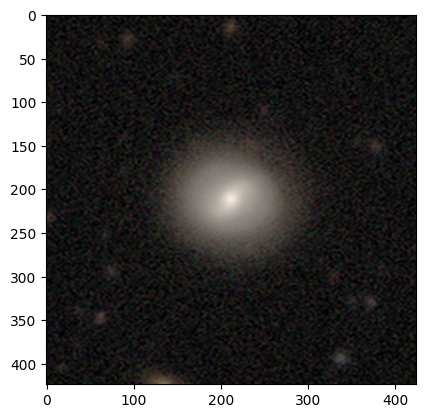

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

plt.imshow(Image.open(catalog.iloc[0]['file_loc']))

In [ ]:
catalog.shape

(800, 6)

In [ ]:
catalog.head()

,id_str,ring_fraction,subfolder,filename,ring,file_loc
0,487483_3522,0.714286,487483,487483_3522.jpg,True,/content/demo_rings/images/487483/487483_3522.jpg
1,287521_2026,0.666667,287521,287521_2026.jpg,True,/content/demo_rings/images/287521/287521_2026.jpg
2,519986_112,0.583333,519986,519986_112.jpg,True,/content/demo_rings/images/519986/519986_112.jpg
3,362959_3369,0.800000,362959,362959_3369.jpg,True,/content/demo_rings/images/362959/362959_3369.jpg
4,426137_3385,0.700000,426137,426137_3385.jpg,True,/content/demo_rings/images/426137/426137_3385.jpg


In [ ]:
len(catalog)

800

In [ ]:
catalog[catalog['ring'] == True].head(15)

,id_str,ring_fraction,subfolder,filename,ring,file_loc
0,487483_3522,0.714286,487483,487483_3522.jpg,True,/content/demo_rings/images/487483/487483_3522.jpg
1,287521_2026,0.666667,287521,287521_2026.jpg,True,/content/demo_rings/images/287521/287521_2026.jpg
2,519986_112,0.583333,519986,519986_112.jpg,True,/content/demo_rings/images/519986/519986_112.jpg
3,362959_3369,0.800000,362959,362959_3369.jpg,True,/content/demo_rings/images/362959/362959_3369.jpg
4,426137_3385,0.700000,426137,426137_3385.jpg,True,/content/demo_rings/images/426137/426137_3385.jpg
7,411764_1964,1.000000,411764,411764_1964.jpg,True,/content/demo_rings/images/411764/411764_1964.jpg
8,320197_5242,0.700000,320197,320197_5242.jpg,True,/content/demo_rings/images/320197/320197_5242.jpg
10,291430_3031,0.800000,291430,291430_3031.jpg,True,/content/demo_rings/images/291430/291430_3031.jpg
12,283856_5475,0.764706,283856,283856_5475.jpg,True,/content/demo_rings/images/283856/283856_5475.jpg
14,164150_2845,0.800000,164150,164150_2845.jpg,True,/content/demo_rings/images/164150/164150_2845.jpg


In [ ]:
catalog[catalog['ring'] == False].head(15)

,id_str,ring_fraction,subfolder,filename,ring,file_loc
5,326716_3461,0.4,326716,326716_3461.jpg,False,/content/demo_rings/images/326716/326716_3461.jpg
6,482348_5038,0.1,482348,482348_5038.jpg,False,/content/demo_rings/images/482348/482348_5038.jpg
9,423704_935,0.4,423704,423704_935.jpg,False,/content/demo_rings/images/423704/423704_935.jpg
11,487592_2793,0.3,487592,487592_2793.jpg,False,/content/demo_rings/images/487592/487592_2793.jpg
13,372728_4301,0.0,372728,372728_4301.jpg,False,/content/demo_rings/images/372728/372728_4301.jpg
15,383995_805,0.2,383995,383995_805.jpg,False,/content/demo_rings/images/383995/383995_805.jpg
16,436125_4430,0.4,436125,436125_4430.jpg,False,/content/demo_rings/images/436125/436125_4430.jpg
17,334866_3651,0.1,334866,334866_3651.jpg,False,/content/demo_rings/images/334866/334866_3651.jpg
18,400947_1235,0.3,400947,400947_1235.jpg,False,/content/demo_rings/images/400947/400947_1235.jpg
22,397119_952,0.4,397119,397119_952.jpg,False,/content/demo_rings/images/397119/397119_952.jpg


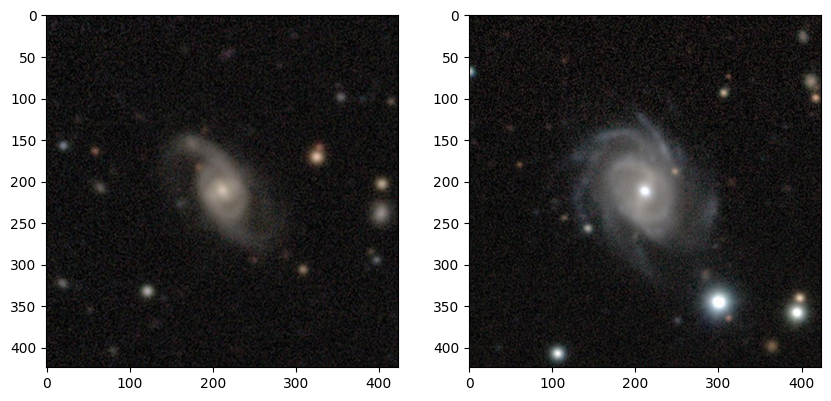

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(10, 10))
axs[0].imshow(Image.open(catalog.iloc[27]['file_loc']))
axs[1].imshow(Image.open(catalog.iloc[32]['file_loc']))
plt.show()

In [1]:
catalog['id_str'].value_counts

NameError: name 'catalog' is not defined